In [ ]:
# Import the dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# grader-required-cell

import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [ ]:
Miner_dir = '/content/drive/MyDrive/Capstone/Dataset - 1/Miner'
Nodisease_dir = '/content/drive/MyDrive/Capstone/Dataset - 1/Nodisease'
Phoma_dir = "/content/drive/MyDrive/Capstone/Dataset - 1/Phoma"
Rust_dir = "/content/drive/MyDrive/Capstone/Dataset - 1/Rust"
Penggerek_dir = '/content/drive/MyDrive/Capstone/Dataset - 1/Penggerek'
Lumut_dir = '/content/drive/MyDrive/Capstone/Dataset - 1/Lumut'
Penggerek_phoma_dir = '/content/drive/MyDrive/Capstone/Dataset - 1/Penggerek Phoma'
Penggerek_lumut_dir = '/content/drive/MyDrive/Capstone/Dataset - 1/Penggerek Lumut'
Phoma_lumut_dir = '/content/drive/MyDrive/Capstone/Dataset - 1/Phoma Lumut'

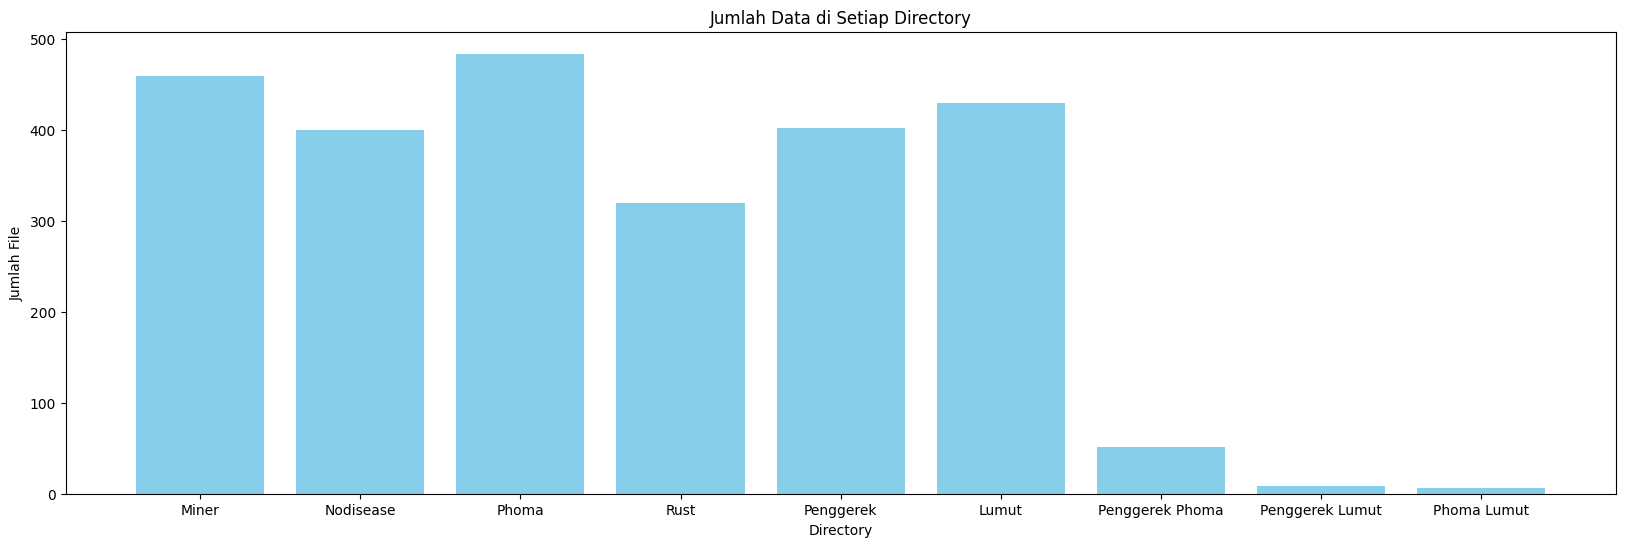

In [ ]:
import os
import matplotlib.pyplot as plt

# Direktori yang ingin dihitung
directories = [Miner_dir, Nodisease_dir, Phoma_dir, Rust_dir, Penggerek_dir, Lumut_dir, Penggerek_phoma_dir, Penggerek_lumut_dir, Phoma_lumut_dir]

# Nama-nama direktori untuk label pada plot
dir_names = ['Miner', 'Nodisease', 'Phoma', 'Rust', 'Penggerek', 'Lumut', 'Penggerek Phoma', 'Penggerek Lumut', 'Phoma Lumut']

# Menghitung jumlah file dalam setiap direktori
file_counts = [len(os.listdir(directory)) for directory in directories]

# Membuat bar plot
plt.figure(figsize=(20, 6))
plt.bar(dir_names, file_counts, color='skyblue')

# Menambahkan judul dan label sumbu
plt.title('Jumlah Data di Setiap Directory')
plt.xlabel('Directory')
plt.ylabel('Jumlah File')

# Menampilkan plot
plt.show()


In [ ]:
import os
import shutil
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img
import math

def create_directory_structure(base_dir, class_names):
    for class_name in class_names:
        dir_path = os.path.join(base_dir, class_name)
        os.makedirs(dir_path, exist_ok=True)

def copy_files(file_list, source_dir, dest_dir):
    for file_name in file_list:
        src_path = os.path.join(source_dir, file_name)
        dest_path = os.path.join(dest_dir, file_name)
        shutil.copy(src_path, dest_path)

def augment_and_save(image, output_dir, prefix, datagen, augment_count):
    img_array = img_to_array(image)
    img_array = img_array.reshape((1,) + img_array.shape)
    i = 0
    for batch in datagen.flow(img_array, batch_size=1, save_to_dir=output_dir, save_prefix=prefix, save_format='jpeg'):
        i += 1
        if i >= augment_count:
            break

def upsample_directory_with_augmentation(source_dir, target_dir, class_name, target_count, datagen):
    class_dir = os.path.join(source_dir, class_name)
    files = os.listdir(class_dir)
    current_count = len(files)
    augment_count = target_count - current_count
    if augment_count <= 0:
        print(f"Class {class_name} already has {current_count} samples, no upsampling needed.")
        return

    dest_class_dir = os.path.join(target_dir, class_name)
    for file_name in files:
        image = load_img(os.path.join(class_dir, file_name))
        prefix = os.path.splitext(file_name)[0]
        augment_and_save(image, dest_class_dir, prefix, datagen, augment_count // current_count + 1)

# Direktori sumber dan target
source_base_dir = '/content/drive/MyDrive/Capstone/Dataset - 1'
target_base_dir = '/content/drive/MyDrive/Capstone/Upsampled Augmented'

# Nama-nama kelas minoritas dan mayoritas
minor_classes = ['Rust', 'Penggerek Phoma', 'Penggerek Lumut', 'Phoma Lumut']
major_classes = ['Miner', 'Nodisease', 'Phoma', 'Penggerek', 'Lumut']

# Menghitung jumlah sampel di setiap kelas mayoritas
major_class_counts = [len(os.listdir(os.path.join(source_base_dir, major_class))) for major_class in major_classes]
target_count = math.ceil(np.mean(major_class_counts))  # Menentukan target count berdasarkan kelas mayoritas dengan sampel terbanyak

# Buat struktur direktori baru
create_directory_structure(target_base_dir, minor_classes + major_classes)

# Data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Upsampling kelas minoritas dengan augmentasi data
for minor_class in minor_classes:
    upsample_directory_with_augmentation(source_base_dir, target_base_dir, minor_class, target_count, datagen)

# Salin kelas mayoritas ke direktori target tanpa perubahan
for major_class in major_classes:
    source_class_dir = os.path.join(source_base_dir, major_class)
    dest_class_dir = os.path.join(target_base_dir, major_class)
    copy_files(os.listdir(source_class_dir), source_class_dir, dest_class_dir)

print("Upsampling selesai dan data disimpan di direktori baru.")


Upsampling selesai dan data disimpan di direktori baru.


In [ ]:
# grader-required-cell

# Define root directory
root_dir = '/content/drive/MyDrive/Capstone/Used Data'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_val_dirs
def create_train_val_test_dirs(root_path):
  train_dir = os.path.join(root_path, 'training')
  os.makedirs(train_dir)
  validation_dir = os.path.join(root_path, 'validation')
  os.makedirs(validation_dir)
  test_dir = os.path.join(root_path, 'test')
  os.makedirs(test_dir)

  # Directory with training pictures
  train_miner_dir = os.path.join(train_dir, 'Miner')
  os.makedirs(train_miner_dir)
  train_nodisease_dir = os.path.join(train_dir, 'Nodisease')
  os.makedirs(train_nodisease_dir)
  train_phoma_dir = os.path.join(train_dir, 'Phoma')
  os.makedirs(train_phoma_dir)
  train_rust_dir = os.path.join(train_dir, 'Rust')
  os.makedirs(train_rust_dir)
  train_penggerek_dir = os.path.join(train_dir, 'Penggerek')
  os.makedirs(train_penggerek_dir)
  train_lumut_dir = os.path.join(train_dir, 'Lumut')
  os.makedirs(train_lumut_dir)
  train_penggerek_phoma_dir = os.path.join(train_dir, 'Penggerek Phoma')
  os.makedirs(train_penggerek_phoma_dir)
  train_penggerek_lumut_dir = os.path.join(train_dir, 'Penggerek Lumut')
  os.makedirs(train_penggerek_lumut_dir)
  train_phoma_lumut_dir = os.path.join(train_dir, 'Phoma Lumut')
  os.makedirs(train_phoma_lumut_dir)

  # Directory with validation pictures
  val_miner_dir = os.path.join(validation_dir, 'Miner')
  os.makedirs(val_miner_dir)
  val_nodisease_dir = os.path.join(validation_dir, 'Nodisease')
  os.makedirs(val_nodisease_dir)
  val_phoma_dir = os.path.join(validation_dir, 'Phoma')
  os.makedirs(val_phoma_dir)
  val_rust_dir = os.path.join(validation_dir, 'Rust')
  os.makedirs(val_rust_dir)
  val_0_dir = os.path.join(validation_dir, 'Penggerek')
  os.makedirs(val_0_dir)
  val_3_dir = os.path.join(validation_dir, 'Lumut')
  os.makedirs(val_3_dir)
  val_0_2_dir = os.path.join(validation_dir, 'Penggerek Phoma')
  os.makedirs(val_0_2_dir)
  val_0_3_dir = os.path.join(validation_dir, 'Penggerek Lumut')
  os.makedirs(val_0_3_dir)
  val_2_3_dir = os.path.join(validation_dir, 'Phoma Lumut')
  os.makedirs(val_2_3_dir)

  # Directory with test pictures
  test_miner_dir = os.path.join(test_dir, 'Miner')
  os.makedirs(test_miner_dir)
  test_nodisease_dir = os.path.join(test_dir, 'Nodisease')
  os.makedirs(test_nodisease_dir)
  test_phoma_dir = os.path.join(test_dir, 'Phoma')
  os.makedirs(test_phoma_dir)
  test_rust_dir = os.path.join(test_dir, 'Rust')
  os.makedirs(test_rust_dir)
  test_0_dir = os.path.join(test_dir, 'Penggerek')
  os.makedirs(test_0_dir)
  test_3_dir = os.path.join(test_dir, 'Lumut')
  os.makedirs(test_3_dir)
  test_0_2_dir = os.path.join(test_dir, 'Penggerek Phoma')
  os.makedirs(test_0_2_dir)
  test_0_3_dir = os.path.join(test_dir, 'Penggerek Lumut')
  os.makedirs(test_0_3_dir)
  test_2_3_dir = os.path.join(test_dir, 'Phoma Lumut')
  os.makedirs(test_2_3_dir)



try:
  create_train_val_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/content/drive/MyDrive/Capstone/Used Data/training
/content/drive/MyDrive/Capstone/Used Data/validation
/content/drive/MyDrive/Capstone/Used Data/test
/content/drive/MyDrive/Capstone/Used Data/training/Miner
/content/drive/MyDrive/Capstone/Used Data/training/Nodisease
/content/drive/MyDrive/Capstone/Used Data/training/Phoma
/content/drive/MyDrive/Capstone/Used Data/training/Rust
/content/drive/MyDrive/Capstone/Used Data/training/Penggerek
/content/drive/MyDrive/Capstone/Used Data/training/Lumut
/content/drive/MyDrive/Capstone/Used Data/training/Penggerek Phoma
/content/drive/MyDrive/Capstone/Used Data/training/Penggerek Lumut
/content/drive/MyDrive/Capstone/Used Data/training/Phoma Lumut
/content/drive/MyDrive/Capstone/Used Data/validation/Miner
/content/drive/MyDrive/Capstone/Used Data/validation/Nodisease
/content/drive/MyDrive/Capstone/Used Data/validation/Phoma
/content/drive/MyDrive/Capstone/Used Data/validation/Rust
/content/drive/MyDrive/Capstone/Used Data/validation/Penggerek
/

In [ ]:
# GRADED FUNCTION: split_data
import os
import random
from shutil import copyfile

def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, TEST_DIR, TRAIN_SPLIT_SIZE, VALID_SPLIT_SIZE):
    # Check if the destination directories exist, if not, create them
    if not os.path.exists(TRAINING_DIR):
        os.makedirs(TRAINING_DIR)
    if not os.path.exists(VALIDATION_DIR):
        os.makedirs(VALIDATION_DIR)
    if not os.path.exists(TEST_DIR):
        os.makedirs(TEST_DIR)

    # Get the list of files in the source directory
    files = os.listdir(SOURCE_DIR)
    # Shuffle the files to randomize
    random.shuffle(files)

    # Calculate the split indices based on the split sizes
    train_split_index = int(len(files) * TRAIN_SPLIT_SIZE)
    valid_split_index = int(len(files) * (TRAIN_SPLIT_SIZE + VALID_SPLIT_SIZE))

    training_files = files[:train_split_index]
    validation_files = files[train_split_index:valid_split_index]
    test_files = files[valid_split_index:]

    # Function to check if a file has zero length
    def has_zero_length(file):
        return os.path.getsize(os.path.join(SOURCE_DIR, file)) == 0

    # Copy training files
    for file in training_files:
        if not has_zero_length(file):
            copyfile(os.path.join(SOURCE_DIR, file), os.path.join(TRAINING_DIR, file))
        else:
            print(f"{file} is zero length, so ignoring.")

    # Copy validation files
    for file in validation_files:
        if not has_zero_length(file):
            copyfile(os.path.join(SOURCE_DIR, file), os.path.join(VALIDATION_DIR, file))
        else:
            print(f"{file} is zero length, so ignoring.")

    # Copy test files
    for file in test_files:
        if not has_zero_length(file):
            copyfile(os.path.join(SOURCE_DIR, file), os.path.join(TEST_DIR, file))
        else:
            print(f"{file} is zero length, so ignoring.")

# Example usage:
# SOURCE_DIR = 'path/to/source'
# TRAINING_DIR = 'path/to/train'
# VALIDATION_DIR = 'path/to/validation'
# TEST_DIR = 'path/to/test'
# TRAIN_SPLIT_SIZE = 0.7
# VALID_SPLIT_SIZE = 0.15
# split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, TEST_DIR, TRAIN_SPLIT_SIZE, VALID_SPLIT_SIZE)


In [ ]:
#after upsampling (GANTI DLU PATHNYA)
Miner_dir = '/content/drive/MyDrive/Capstone/Upsampled Augmented/Miner'
Nodisease_dir = '/content/drive/MyDrive/Capstone/Upsampled Augmented/Nodisease'
Phoma_dir = "/content/drive/MyDrive/Capstone/Upsampled Augmented/Phoma"
Rust_dir = "/content/drive/MyDrive/Capstone/Upsampled Augmented/Rust"
Penggerek_dir = '/content/drive/MyDrive/Capstone/Upsampled Augmented/Penggerek'
Lumut_dir = '/content/drive/MyDrive/Capstone/Upsampled Augmented/Lumut'
Penggerek_phoma_dir = '/content/drive/MyDrive/Capstone/Upsampled Augmented/Penggerek Phoma'
Penggerek_lumut_dir = '/content/drive/MyDrive/Capstone/Upsampled Augmented/Penggerek Lumut'
Phoma_lumut_dir = '/content/drive/MyDrive/Capstone/Upsampled Augmented/Phoma Lumut'

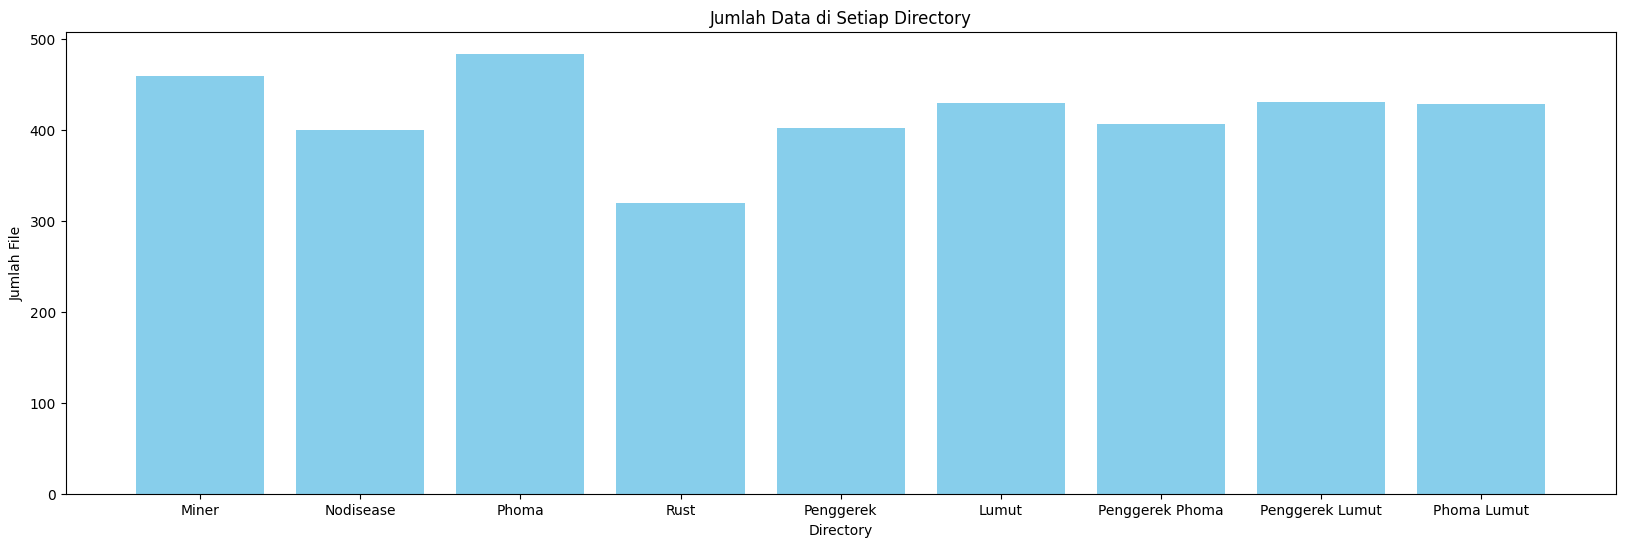

In [ ]:
import os
import matplotlib.pyplot as plt

# Direktori yang ingin dihitung
directories = [Miner_dir, Nodisease_dir, Phoma_dir, Rust_dir, Penggerek_dir, Lumut_dir, Penggerek_phoma_dir, Penggerek_lumut_dir, Phoma_lumut_dir]

# Nama-nama direktori untuk label pada plot
dir_names = ['Miner', 'Nodisease', 'Phoma', 'Rust', 'Penggerek', 'Lumut', 'Penggerek Phoma', 'Penggerek Lumut', 'Phoma Lumut']

# Menghitung jumlah file dalam setiap direktori
file_counts = [len(os.listdir(directory)) for directory in directories]

# Membuat bar plot
plt.figure(figsize=(20, 6))
plt.bar(dir_names, file_counts, color='skyblue')

# Menambahkan judul dan label sumbu
plt.title('Jumlah Data di Setiap Directory')
plt.xlabel('Directory')
plt.ylabel('Jumlah File')

# Menampilkan plot
plt.show()


In [ ]:
TRAINING_DIR = '/content/drive/MyDrive/Capstone/Used Data/training'
VALIDATION_DIR = "/content/drive/MyDrive/Capstone/Used Data/validation"
TEST_DIR = '/content/drive/MyDrive/Capstone/Used Data/test'

TRAINING_MINER_DIR = os.path.join(TRAINING_DIR, "Miner")
VALIDATION_MINER_DIR = os.path.join(VALIDATION_DIR, "Miner")
TEST_MINER_DIR = os.path.join(TEST_DIR, "Miner")

TRAINING_NODISEASE_DIR = os.path.join(TRAINING_DIR, "Nodisease")
VALIDATION_NODISEASE_DIR = os.path.join(VALIDATION_DIR, "Nodisease")
TEST_NODISEASE_DIR = os.path.join(TEST_DIR, "Nodisease")

TRAINING_PHOMA_DIR = os.path.join(TRAINING_DIR, "Phoma")
VALIDATION_PHOMA_DIR = os.path.join(VALIDATION_DIR, "Phoma")
TEST_PHOMA_DIR = os.path.join(TEST_DIR, "Phoma")

TRAINING_RUST_DIR = os.path.join(TRAINING_DIR, "Rust")
VALIDATION_RUST_DIR = os.path.join(VALIDATION_DIR, "Rust")
TEST_RUST_DIR = os.path.join(TEST_DIR, "Rust")

TRAINING_PENGGEREK_DIR = os.path.join(TRAINING_DIR, "Penggerek")
VALIDATION_PENGGEREK_DIR = os.path.join(VALIDATION_DIR, "Penggerek")
TEST_PENGGEREK_DIR = os.path.join(TEST_DIR, "Penggerek")


TRAINING_LUMUT_DIR = os.path.join(TRAINING_DIR, "Lumut")
VALIDATION_LUMUT_DIR = os.path.join(VALIDATION_DIR, "Lumut")
TEST_LUMUT_DIR = os.path.join(TEST_DIR, "Lumut")

TRAINING_PENGGEREK_PHOMA_DIR = os.path.join(TRAINING_DIR, "Penggerek Phoma")
VALIDATION_PENGGEREK_PHOMA_DIR = os.path.join(VALIDATION_DIR, "Penggerek Phoma")
TEST_PENGGEREK_PHOMA_DIR = os.path.join(TEST_DIR, "Penggerek Phoma")

TRAINING_PENGGEREK_LUMUT_DIR = os.path.join(TRAINING_DIR, "Penggerek Lumut")
VALIDATION_PENGGEREK_LUMUT_DIR = os.path.join(VALIDATION_DIR, "Penggerek Lumut")
TEST_PENGGEREK_LUMUT_DIR = os.path.join(TEST_DIR, "Penggerek Lumut")

TRAINING_PHOMA_LUMUT_DIR = os.path.join(TRAINING_DIR, "Phoma Lumut")
VALIDATION_PHOMA_LUMUT_DIR = os.path.join(VALIDATION_DIR, "Phoma Lumut")
TEST_PHOMA_LUMUT_DIR = os.path.join(TEST_DIR, "Phoma Lumut")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_MINER_DIR)) > 0:
  for file in os.scandir(TRAINING_MINER_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_NODISEASE_DIR)) > 0:
  for file in os.scandir(TRAINING_NODISEASE_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_PHOMA_DIR)) > 0:
  for file in os.scandir(TRAINING_PHOMA_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_RUST_DIR)) > 0:
  for file in os.scandir(TRAINING_RUST_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_PENGGEREK_DIR)) > 0:
  for file in os.scandir(TRAINING_PENGGEREK_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_LUMUT_DIR)) > 0:
  for file in os.scandir(TRAINING_LUMUT_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_PENGGEREK_PHOMA_DIR)) > 0:
  for file in os.scandir(TRAINING_PENGGEREK_PHOMA_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_PENGGEREK_LUMUT_DIR)) > 0:
  for file in os.scandir(TRAINING_PENGGEREK_LUMUT_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_PHOMA_LUMUT_DIR)) > 0:
  for file in os.scandir(TRAINING_PHOMA_LUMUT_DIR):
    os.remove(file.path)

if len(os.listdir(VALIDATION_MINER_DIR)) > 0:
  for file in os.scandir(VALIDATION_MINER_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_NODISEASE_DIR)) > 0:
  for file in os.scandir(VALIDATION_NODISEASE_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_PHOMA_DIR)) > 0:
  for file in os.scandir(VALIDATION_PHOMA_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_RUST_DIR)) > 0:
  for file in os.scandir(VALIDATION_RUST_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_PENGGEREK_DIR)) > 0:
  for file in os.scandir(VALIDATION_PENGGEREK_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_LUMUT_DIR)) > 0:
  for file in os.scandir(VALIDATION_LUMUT_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_PENGGEREK_PHOMA_DIR)) > 0:
  for file in os.scandir(VALIDATION_PENGGEREK_PHOMA_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_PENGGEREK_LUMUT_DIR)) > 0:
  for file in os.scandir(VALIDATION_PENGGEREK_LUMUT_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_PHOMA_LUMUT_DIR)) > 0:
  for file in os.scandir(VALIDATION_PHOMA_LUMUT_DIR):
    os.remove(file.path)

if len(os.listdir(TEST_MINER_DIR)) > 0:
  for file in os.scandir(TEST_MINER_DIR):
    os.remove(file.path)
if len(os.listdir(TEST_NODISEASE_DIR)) > 0:
  for file in os.scandir(TEST_NODISEASE_DIR):
    os.remove(file.path)
if len(os.listdir(TEST_PHOMA_DIR)) > 0:
  for file in os.scandir(TEST_PHOMA_DIR):
    os.remove(file.path)
if len(os.listdir(TEST_RUST_DIR)) > 0:
  for file in os.scandir(TEST_RUST_DIR):
    os.remove(file.path)
if len(os.listdir(TEST_PENGGEREK_DIR)) > 0:
  for file in os.scandir(TEST_PENGGEREK_DIR):
    os.remove(file.path)
if len(os.listdir(TEST_LUMUT_DIR)) > 0:
  for file in os.scandir(TEST_LUMUT_DIR):
    os.remove(file.path)
if len(os.listdir(TEST_PENGGEREK_PHOMA_DIR)) > 0:
  for file in os.scandir(TEST_PENGGEREK_PHOMA_DIR):
    os.remove(file.path)
if len(os.listdir(TEST_PENGGEREK_LUMUT_DIR)) > 0:
  for file in os.scandir(TEST_PENGGEREK_LUMUT_DIR):
    os.remove(file.path)
if len(os.listdir(TEST_PHOMA_LUMUT_DIR)) > 0:
  for file in os.scandir(TEST_PHOMA_LUMUT_DIR):
    os.remove(file.path)

# Define proportion of images used for training
train_split_size= .7
valid_split_size = 0.15

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(Miner_dir, TRAINING_MINER_DIR, VALIDATION_MINER_DIR, TEST_MINER_DIR, train_split_size, valid_split_size)
split_data(Nodisease_dir, TRAINING_NODISEASE_DIR, VALIDATION_NODISEASE_DIR, TEST_NODISEASE_DIR, train_split_size, valid_split_size)
split_data(Phoma_dir, TRAINING_PHOMA_DIR, VALIDATION_PHOMA_DIR,TEST_PHOMA_DIR, train_split_size, valid_split_size)
split_data(Rust_dir, TRAINING_RUST_DIR, VALIDATION_RUST_DIR, TEST_RUST_DIR, train_split_size, valid_split_size)
split_data(Penggerek_dir, TRAINING_PENGGEREK_DIR, VALIDATION_PENGGEREK_DIR, TEST_PENGGEREK_DIR, train_split_size, valid_split_size)
split_data(Lumut_dir, TRAINING_LUMUT_DIR, VALIDATION_LUMUT_DIR, TEST_LUMUT_DIR, train_split_size, valid_split_size)
split_data(Penggerek_phoma_dir, TRAINING_PENGGEREK_PHOMA_DIR, VALIDATION_PENGGEREK_PHOMA_DIR, TEST_PENGGEREK_PHOMA_DIR, train_split_size, valid_split_size)
split_data(Penggerek_lumut_dir, TRAINING_PENGGEREK_LUMUT_DIR, VALIDATION_PENGGEREK_LUMUT_DIR, TEST_PENGGEREK_LUMUT_DIR, train_split_size, valid_split_size)
split_data(Phoma_lumut_dir, TRAINING_PHOMA_LUMUT_DIR, VALIDATION_PHOMA_LUMUT_DIR, TEST_PHOMA_LUMUT_DIR, train_split_size, valid_split_size)

# Check that the number of images matches the expected output

# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal Miner directory has {len(os.listdir(Miner_dir))} images")
print(f"Original Nodisease directory has {len(os.listdir(Nodisease_dir))} images")
print(f"Original Phoma directory has {len(os.listdir(Phoma_dir))} images")
print(f"Original Rust directory has {len(os.listdir(Rust_dir))} images")
print(f"Original Penggerek directory has {len(os.listdir(Penggerek_dir))} images")
print(f"Original Lumut directory has {len(os.listdir(Lumut_dir))} images")
print(f"Original Penggerek Phoma directory has {len(os.listdir(Penggerek_phoma_dir))} images")
print(f"Original Penggerek Lumut directory has {len(os.listdir(Penggerek_lumut_dir))} images")
print(f"Original Phoma Lumut directory has {len(os.listdir(Phoma_lumut_dir))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_MINER_DIR))} images of Miner for training")
print(f"There are {len(os.listdir(TRAINING_NODISEASE_DIR))} images of Nodisease for training")
print(f"There are {len(os.listdir(TRAINING_PHOMA_DIR))} images of Phoma for training")
print(f"There are {len(os.listdir(TRAINING_RUST_DIR))} images of Rust for training")
print(f"There are {len(os.listdir(TRAINING_PENGGEREK_DIR))} images of Penggerek for training")
print(f"There are {len(os.listdir(TRAINING_LUMUT_DIR))} images of Lumut for training")
print(f"There are {len(os.listdir(TRAINING_PENGGEREK_PHOMA_DIR))} images of Penggerek Phoma for training")
print(f"There are {len(os.listdir(TRAINING_PENGGEREK_LUMUT_DIR))} images of Penggerek Lumut for training")
print(f"There are {len(os.listdir(TRAINING_PHOMA_LUMUT_DIR))} images of Phoma Lumut for training\n")

print(f"There are {len(os.listdir(VALIDATION_MINER_DIR))} images of Miner for validation")
print(f"There are {len(os.listdir(VALIDATION_NODISEASE_DIR))} images of Nodisease for validation")
print(f"There are {len(os.listdir(VALIDATION_PHOMA_DIR))} images of Phoma for validation")
print(f"There are {len(os.listdir(VALIDATION_RUST_DIR))} images of Rust for validation")
print(f"There are {len(os.listdir(VALIDATION_PENGGEREK_DIR))} images of Penggerek for validation")
print(f"There are {len(os.listdir(VALIDATION_LUMUT_DIR))} images of Lumut for validation")
print(f"There are {len(os.listdir(VALIDATION_PENGGEREK_PHOMA_DIR))} images of Penggerek Phoma for validation")
print(f"There are {len(os.listdir(VALIDATION_PENGGEREK_LUMUT_DIR))} images of Penggerek Lumut for validation")
print(f"There are {len(os.listdir(VALIDATION_PHOMA_LUMUT_DIR))} images of Phoma Lumut for validation\n")

print(f"There are {len(os.listdir(TEST_MINER_DIR))} images of Miner for test")
print(f"There are {len(os.listdir(TEST_NODISEASE_DIR))} images of Nodisease for test")
print(f"There are {len(os.listdir(TEST_PHOMA_DIR))} images of Phoma for test")
print(f"There are {len(os.listdir(TEST_RUST_DIR))} images of Rust for test")
print(f"There are {len(os.listdir(TEST_PENGGEREK_DIR))} images of Penggerek for test")
print(f"There are {len(os.listdir(TEST_LUMUT_DIR))} images of Lumut for test")
print(f"There are {len(os.listdir(TEST_PENGGEREK_PHOMA_DIR))} images of Penggerek Phoma for test")
print(f"There are {len(os.listdir(TEST_PENGGEREK_LUMUT_DIR))} images of Penggerek Lumut for test")
print(f"There are {len(os.listdir(TEST_PHOMA_LUMUT_DIR))} images of Phoma Lumut for test")



Original Miner directory has 459 images
Original Nodisease directory has 400 images
Original Phoma directory has 484 images
Original Rust directory has 320 images
Original Penggerek directory has 402 images
Original Lumut directory has 430 images
Original Penggerek Phoma directory has 407 images
Original Penggerek Lumut directory has 431 images
Original Phoma Lumut directory has 429 images

There are 321 images of Miner for training
There are 280 images of Nodisease for training
There are 338 images of Phoma for training
There are 224 images of Rust for training
There are 281 images of Penggerek for training
There are 301 images of Lumut for training
There are 284 images of Penggerek Phoma for training
There are 301 images of Penggerek Lumut for training
There are 300 images of Phoma Lumut for training

There are 69 images of Miner for validation
There are 60 images of Nodisease for validation
There are 73 images of Phoma for validation
There are 48 images of Rust for validation
Ther

In [ ]:
# grader-required-cell

# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR, TEST_DIR):
  """
  Creates the training and validation data generators

  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images

  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=64,
                                                      class_mode='categorical',
                                                      target_size=(256, 256))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1./255,
                                          rotation_range=40,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=64,
                                                                class_mode='categorical',
                                                                target_size=(256, 256))

  test_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')


  test_generator = test_datagen.flow_from_directory(directory=TEST_DIR,
                                                      batch_size=64,
                                                      class_mode='categorical',
                                                      target_size=(256, 256))
  ### END CODE HERE
  return train_generator, validation_generator, test_generator

In [ ]:
train_generator, validation_generator, test_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR, TEST_DIR)

Found 2630 images belonging to 9 classes.
Found 564 images belonging to 9 classes.
Found 568 images belonging to 9 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98):
      print("\nReached 98% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy
model= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss= CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_generator,
                    epochs=50,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks=myCallback())


Epoch 1/50
42/42 [==============================] - 428s 10s/step - loss: 1.9069 - accuracy: 0.2137 - val_loss: 1.5918 - val_accuracy: 0.3440
Epoch 2/50
42/42 [==============================] - 411s 10s/step - loss: 1.5452 - accuracy: 0.3308 - val_loss: 1.4365 - val_accuracy: 0.3706
Epoch 3/50
42/42 [==============================] - 403s 9s/step - loss: 1.3675 - accuracy: 0.4190 - val_loss: 1.2590 - val_accuracy: 0.4947
Epoch 4/50
42/42 [==============================] - 416s 10s/step - loss: 1.2252 - accuracy: 0.4848 - val_loss: 1.1613 - val_accuracy: 0.5053
Epoch 5/50
42/42 [==============================] - 417s 10s/step - loss: 1.1632 - accuracy: 0.5106 - val_loss: 1.0682 - val_accuracy: 0.5904
Epoch 6/50
42/42 [==============================] - 406s 10s/step - loss: 1.0834 - accuracy: 0.5578 - val_loss: 0.9720 - val_accuracy: 0.6152
Epoch 7/50
42/42 [==============================] - 409s 10s/step - loss: 1.0431 - accuracy: 0.5837 - val_loss: 1.0065 - val_accuracy: 0.6099
Epoch 8

In [ ]:
model.save('/content/my_model2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files

# Men-download file ke perangkat lokal
files.download('/content/my_model2.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy}")